# Simulation of Arc-sine Law of Lévy

For google colab only  
↓↓↓↓↓

In [0]:
!apt install fonts-ipaexfont-gothic
!rm /root/.cache/matplotlib/fontlist-v300.json

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

### -------- Restert the runtime here. ----------
 
 if you use google colab.

In [0]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

matplotlib.rcParams['font.family'] = 'IPAexGothic'
sns.set(font='IPAexGothic')

# Brownian motion (Wiener process)
___

A 1-dimensional Brownian motion $B(t)$ is a stochastic process satisfying the following four conditions:
1. $B(0) = 0 \,\, a.s.$
1. For any $0 \le s < t$, $B(t) - B(s)$ is normally distributed with mean $0$ and variance $t-s$.
1. $B(t)$ has independent increments.
1. Almost all sample paths of $B(t)$ is continuous.

Let $B_1(t), B_2(t), \dots B_n(t)$ be n independent Brownian motions. A n-dimensional Brownian motion $B(t)$ is the following:
$$B(t) = (B_1(t), B_2(t), \dots , B_n(t)).$$ 

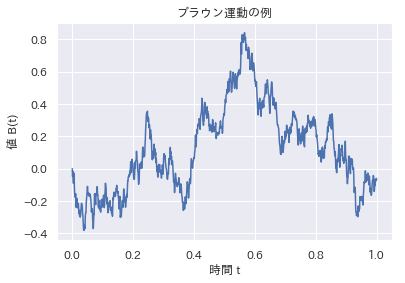

In [0]:
step = 1000

diffs = np.random.randn(step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[0] = 0.
x = np.linspace(0, 1, step+1)
bm = np.cumsum(diffs)
plt.plot(x, bm)
plt.xlabel("時間 t")
plt.ylabel("値 B(t)")
plt.title("ブラウン運動の例")
# plt.savefig("./gdrive/My Drive/pictures/BM-example.png")
plt.show()

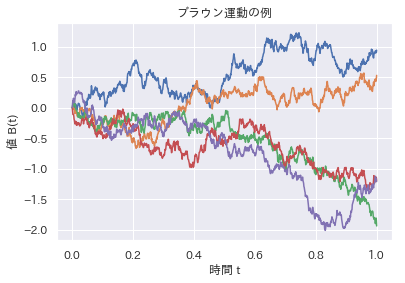

In [0]:
step = 1000
num = 5

diffs = np.random.randn(num, step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[:, 0] = 0.
x = np.linspace(0, 1, step+1)
bms = np.cumsum(diffs, axis=1)
for bm in bms:
    plt.plot(x, bm)
plt.xlabel("時間 t")
plt.ylabel("値 B(t)")
plt.title("ブラウン運動の例")
# plt.savefig("./gdrive/My Drive/pictures/BMS-example.png")
plt.show()

## Arc-sine law of Lévy

**Theorem**  
Let $L_t = \int^t_0 \text{sgn}^+(B(s))\, ds = \int^t_0 1_{\{(B(s)) > 0\}}\, ds $ be the amount of time that a Browinan motion is positive during $[0, t]$. Then,
$$ P(L_t \le \tau)\, = \, \frac{2}{\pi}\arcsin \sqrt{\frac{\tau}{t}}, \,\,\, 0 \le \tau \le t.$$

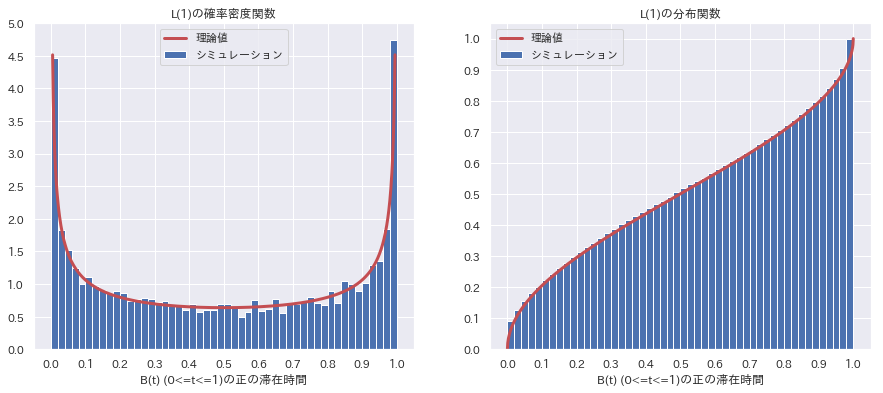

In [0]:
step = 1000
num = 10000

diffs = np.random.randn(num, step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[:, 0] = 0.
bms = np.cumsum(diffs, axis=1)
cal_positive = np.mean(bms[:, 1:] > 0, axis=1)
x = np.linspace(0.005, 0.995, 990+1)
thm_positive = 1 / np.pi * 1 / np.sqrt(x * (1 - x))
xd = np.linspace(0, 1, 1000+1)
thm_dist = (2 / np.pi) * np.arcsin(np.sqrt(xd))

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(cal_positive, bins=50, density=True, label="シミュレーション")
plt.plot(x, thm_positive, linewidth=3, color='r', label="理論値")
plt.xlabel("B(t) (0<=t<=1)の正の滞在時間")
plt.xticks(np.linspace(0, 1, 10+1))
plt.yticks(np.linspace(0, 5, 10+1))
plt.title("L(1)の確率密度関数")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(cal_positive, bins=50, density=True, cumulative=True, label="シミュレーション")
plt.plot(xd, thm_dist, linewidth=3, color='r', label="理論値")
plt.xlabel("B(t) (0<=t<=1)の正の滞在時間")
plt.xticks(np.linspace(0, 1, 10+1))
plt.yticks(np.linspace(0, 1, 10+1))
plt.title("L(1)の分布関数")
plt.legend()
# plt.savefig("./gdrive/My Drive/pictures/arcsin-example.png")
plt.show()

## Integral of a Brownian motion
A integral of a Brownian motion is normally distributed with mean 0 and variance $\frac{1}{3} t^3$,  i. e., 

$$\int_0^t B(s)\, ds  \sim N\bigg{(} 0,\frac{1}{3}t^3 \bigg{)}. $$

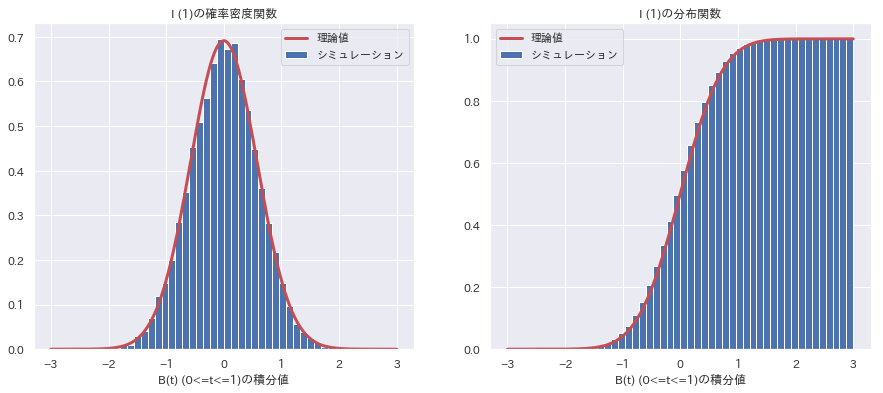

In [8]:
step = 1000
num = 10000

diffs = np.random.randn(num, step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[:, 0] = 0.
bms = np.cumsum(diffs, axis=1)
cal_inte = np.mean(bms[:, 1:], axis=1)
x = np.linspace(-3, 3, 1000+1)
thm_inte = 1 / (np.sqrt(2 * np.pi * (1 / 3))) * np.exp(- x**2  / (2 * 1/3))
thm_cum = np.cumsum(thm_inte) / len(x) * 6


plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.hist(cal_inte, bins=50, density=True, range=(-3, 3), label="シミュレーション")
plt.plot(x, thm_inte, linewidth=3, color='r', label="理論値")
plt.xlabel("B(t) (0<=t<=1)の積分値")
plt.title("I (1)の確率密度関数")
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(cal_inte, bins=50, density=True, cumulative=True, range=(-3, 3), label="シミュレーション")
plt.plot(x, thm_cum, linewidth=3, color='r', label="理論値")
plt.xlabel("B(t) (0<=t<=1)の積分値")
plt.title("I (1)の分布関数")
plt.legend()
plt.savefig("./gdrive/My Drive/pictures/integral-example.png")
plt.show()


## Simultaneous distribution

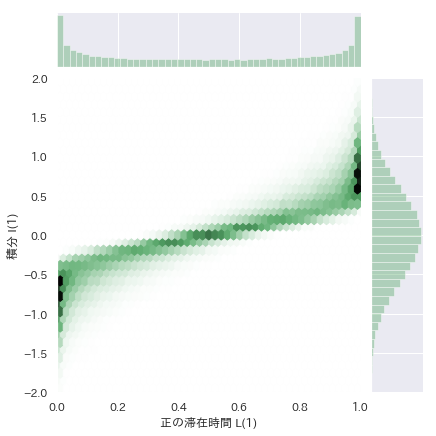

In [6]:
step = 1000
num = 300000

diffs = np.random.randn(num, step+1).astype(np.float32) * np.sqrt(1 / step)
diffs[:, 0] = 0.
bms = np.cumsum(diffs, axis=1)
cal_inte = np.mean(bms[:, 1:], axis=1)
cal_positive = np.mean(bms[:, 1:] > 0, axis=1)

sns.jointplot(x=cal_positive, y=cal_inte, xlim=(0, 1), ylim=(-2, 2), color="g", kind='hex').set_axis_labels('正の滞在時間 L(1)', '積分 I(1)')                                                                                                          
plt.savefig("./gdrive/My Drive/pictures/simultaneous.png")
plt.show()

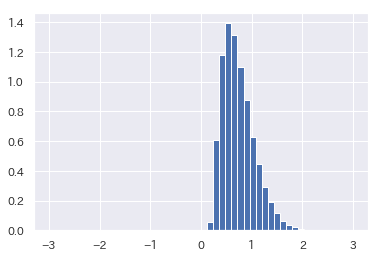

In [7]:
cal_inte_f = cal_inte[cal_positive > 0.9]

plt.hist(cal_inte_f, bins=50, density=True, range=(-3, 3))
plt.show()